In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
def genPoisson(l, T, N, distribution):
    
    """
    l : lambda, the packet arrival rate
    T : time window
    N : nb of classes
    distribution : array which contains the distribution for each class
    This function generates packets according to a poisson distribution
    """
    
    packets = []
    
    nbArrivals = np.random.poisson(l)
    for packet in range(nbArrivals) :
       typeEvent = np.random.choice(N, p=distribution) 
       packets.append((typeEvent+1, T))
    return packets

In [5]:
def equation(capacity):
    distributions = [1/3, 1/12, 1/4, 1/3]
    currentCapacity = 0
    alpha = 0
    for distribution in distributions :
        if (currentCapacity + distribution) < capacity :
            currentCapacity = currentCapacity + distribution
            alpha = alpha + 1
        elif currentCapacity < capacity :
            alpha = alpha + ((capacity - currentCapacity) / distribution)
            currentCapacity = currentCapacity + ((capacity - currentCapacity) / distribution)
    return alpha

print(equation(0.34))

1.0800000000000005


In [5]:
def knapsack(packets, capacity):
    currentCapacity = 0
    totalReward = 0
    policy = [0]*len(packets)
    alpha = 0
    rewards = [100, 50, 10, 1]
    distribution = [1/3, 1/12, 1/4, 1/3]
    packets.sort(key=lambda x: x[0])
    print(packets)
    nbEvents = [0,0,0,0]
    nbAccepted = [0,0,0,0]
    for i, (typeEvent, time) in enumerate(packets) :
        nbEvents[typeEvent - 1] = nbEvents[typeEvent - 1] + 1
        if (currentCapacity + distribution[typeEvent - 1]) < capacity :
            currentCapacity = currentCapacity + distribution[typeEvent - 1]
            policy[i] = 1
            nbAccepted[typeEvent - 1] = nbAccepted[typeEvent-1] +1
            totalReward = totalReward + rewards[typeEvent -1]
    print(policy)
    print(totalReward)
    print(nbEvents, nbAccepted)
    return policy  


0.2
0
alpha :  0.7455119207605396
alpha :  0.870008233798941
alpha :  0.9258388620725062
alpha :  0.9547648981798785
alpha :  0.9738630847558809
alpha :  0.9861436888132475
alpha :  0.9944905538941214
alpha :  1.000590993209346
alpha :  1.0058827682035867
alpha :  1.009578236552875
alpha :  1.0131388017132394
alpha :  1.0171276145943502
alpha :  1.0195050616761725
alpha :  1.0218823008541973
alpha :  1.024946116623703
alpha :  1.028427845613451
alpha :  1.0307715380139686
alpha :  1.0325108508633865
alpha :  1.0334074817338577
alpha :  1.0349085086640681
alpha :  1.036417863251918
alpha :  1.0372077387679373
alpha :  1.0382979168631647
alpha :  1.040008031195285
alpha :  1.0422305310266644
alpha :  1.0428056445905285
alpha :  1.043817431102217
alpha :  1.0446221878629476
alpha :  1.044687702045688
alpha :  1.04520244079869
alpha :  1.0457301116389972
alpha :  1.0474246886626508
alpha :  1.047959238631631
alpha :  1.048764746174488
alpha :  1.049839632175777
alpha :  1.0506133442748782


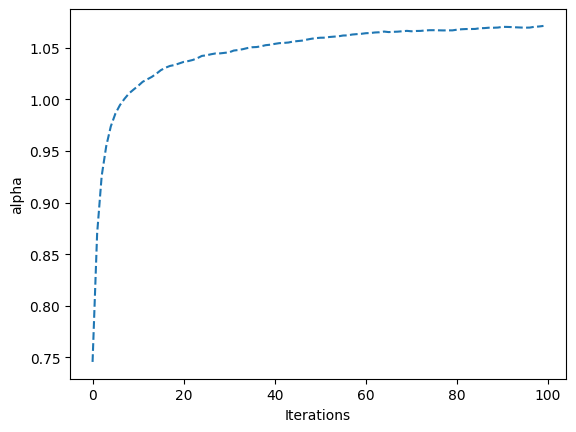

In [5]:
def robbinsMonro(N, capacity, gamma, e0):
    n = 1
    e = e0 
    #alpha = np.random.uniform(0,N)
    alpha = 0.2
    print(alpha)
    print(math.floor(alpha))
    list_of_alpha = []
    
    for episode in range(100):
        packets = genPoisson(10**5, 1, 4, [1/3, 1/12, 1/4, 1/3])
        packets.sort(key=lambda x: x[1]) #trier par ordre chrono
        admittedPacquets = 0
        rejectedPacquets = 0
        fraction = alpha - math.floor(alpha)
        
        count = 0
        for numero_classe, temps in packets:
            if numero_classe == (math.floor(alpha)+1):
                count += 1
                
        nbMiddleClass = int((fraction)*count)
        
                
        for (typeEvent, packet) in packets :            
            if typeEvent <= math.floor(alpha) :
                admittedPacquets = admittedPacquets + 1 
            elif typeEvent == (math.floor(alpha)+1) and nbMiddleClass > 0 :
                admittedPacquets = admittedPacquets + 1
                nbMiddleClass = nbMiddleClass - 1
            else :
                rejectedPacquets = rejectedPacquets +1
        Y = admittedPacquets / (admittedPacquets + rejectedPacquets)
        alpha = alpha + e * (capacity-Y)
        alpha = max(0, min(alpha, N))
        n = n +1
        e = e0 / (n**gamma)
        list_of_alpha.append(alpha)
        print("alpha : ", alpha)
    plt.xlabel('Iterations')
    plt.ylabel('alpha')
    plt.plot([i for i in range(100)], list_of_alpha, '--',)
robbinsMonro(4, 0.34, 0.55, 2)

0.5
0
alpha :  0.6377917970944699
alpha :  0.7393496783631497
alpha :  0.8134670149244125
alpha :  0.8672684302362422
alpha :  0.9076507978636216
alpha :  0.9373658656950293
alpha :  0.9595584330936189
alpha :  0.9762098975913984
alpha :  0.9862293742074366
alpha :  0.9968598059581489
alpha :  1.0010367357066312
alpha :  1.0052024939624824
alpha :  1.0104478897314864
alpha :  1.013900268067201
alpha :  1.018025667531595
alpha :  1.021911735272404
alpha :  1.0256748834001188
alpha :  1.0312007037255422
alpha :  1.0335481602561525
alpha :  1.0368014727892778
alpha :  1.0399085768648315
alpha :  1.042808196179598
alpha :  1.0444807281448072
alpha :  1.0491181575500683
alpha :  1.0508175146722152
alpha :  1.05080825097632
alpha :  1.0516748909442815
alpha :  1.052627514653501
alpha :  1.056249152513748
alpha :  1.0554594392320613
alpha :  1.0593791756800996
alpha :  1.0631394040340483
alpha :  1.0640955117442072
alpha :  1.066794491031499
alpha :  1.0680380574468877
alpha :  1.068708410657

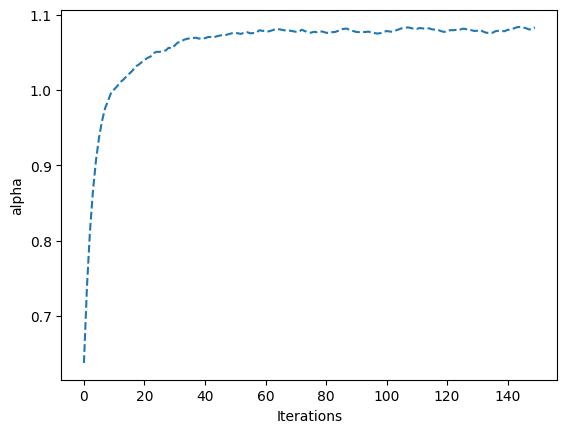

In [6]:
def robbinsMonroEConstant(N, capacity, e):
    n = 1
    #alpha = np.random.uniform(0,N)
    alpha = 0.5
    print(alpha)
    print(math.floor(alpha))
    list_of_alpha = []
    for episode in range(150):
        packets = genPoisson(10**5, 1, 4, [1/3, 1/12, 1/4, 1/3])
        packets.sort(key=lambda x: x[1]) #trier par ordre chrono
        admittedPacquets = 0
        rejectedPacquets = 0
        
        fraction = alpha - math.floor(alpha)
        
        count = 0
        for numero_classe, temps in packets:
            if numero_classe == (math.floor(alpha)+1):
                count += 1
                
        nbMiddleClass = int((fraction)*count)
        
        for (typeEvent, packet) in packets :
            # print(typeEvent)
            if typeEvent <= math.floor(alpha) :
                admittedPacquets = admittedPacquets + 1 
            elif typeEvent == (math.floor(alpha)+1) and nbMiddleClass > 0 :
                admittedPacquets = admittedPacquets + 1
                nbMiddleClass = nbMiddleClass - 1
            else :
                rejectedPacquets = rejectedPacquets +1
        Y = admittedPacquets / (admittedPacquets + rejectedPacquets)
        alpha = alpha + e * (capacity-Y)
        alpha = max(0, min(alpha, N))
        n = n +1
        print("alpha : ", alpha)
        list_of_alpha.append(alpha)
    plt.xlabel('Iterations')
    plt.ylabel('alpha')
    plt.plot([i for i in range(150)], list_of_alpha, '--',)

robbinsMonroEConstant(4, 0.34, 0.8)

0.5
0
alpha :  0.8476565008025683
alpha :  1.0065978750594702
alpha :  1.0932359272626164
alpha :  1.1483345692900402
alpha :  1.1867338407170323
alpha :  1.2146121520379893
alpha :  1.2355324095635027
alpha :  1.2516349482732259
alpha :  1.2639411474603421
alpha :  1.2734685775573358
alpha :  1.2809230578852542
alpha :  1.28675188700694
alpha :  1.2912565992806624
alpha :  1.2947038147065786
alpha :  1.2972686814860894
alpha :  1.2991458347547682
alpha :  1.3003730937390885
alpha :  1.3010793997505843
alpha :  1.3013563977717963
alpha :  1.3012577721229361
alpha :  1.3008548269768252
alpha :  1.3001530721701553
alpha :  1.2992077801340853
alpha :  1.2980834192530848
alpha :  1.2967764842624854
alpha :  1.2953287779203293
alpha :  1.2937471944377843
alpha :  1.2920323241134335
alpha :  1.290236481494205
alpha :  1.2883564850383618
alpha :  1.2863890127925182
alpha :  1.2843308207251654
alpha :  1.2822355837601345
alpha :  1.2800699108539058
alpha :  1.2778533142435262
alpha :  1.275617

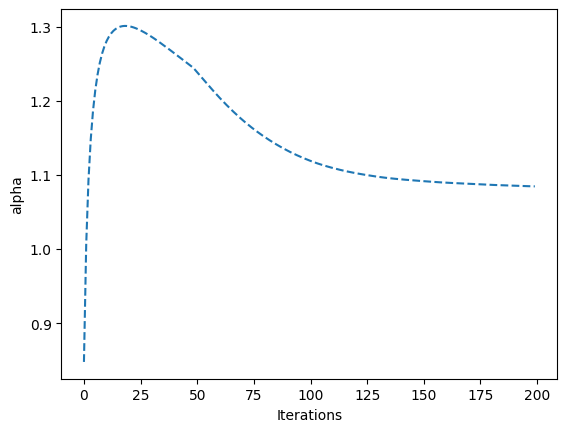

In [5]:
def polyakAverage(N, capacity, gamma, e0):
    n = 1
    e = e0 
    #alpha = np.random.uniform(0,N)
    alpha = 0.5
    print(alpha)
    print(math.floor(alpha))
    allY = []
    list_of_alpha = []
    for episode in range(200):
        packets = genPoisson(10**5, 1, 4, [1/3, 1/12, 1/4, 1/3])
        packets.sort(key=lambda x: x[1]) #trier par ordre chrono
        admittedPacquets = 0
        rejectedPacquets = 0
        
        fraction = alpha - math.floor(alpha)
        
        count = 0
        for numero_classe, temps in packets:
            if numero_classe == (math.floor(alpha)+1):
                count += 1
                
        nbMiddleClass = int((fraction)*count)
        
        for (typeEvent, packet) in packets :
            if typeEvent <= math.floor(alpha) :
                admittedPacquets = admittedPacquets + 1 
            elif typeEvent == (math.floor(alpha)+1) and nbMiddleClass > 0 :
                admittedPacquets = admittedPacquets + 1
                nbMiddleClass = nbMiddleClass - 1
            else :
                rejectedPacquets = rejectedPacquets +1
        Y = admittedPacquets / (admittedPacquets + rejectedPacquets)
        allY.append(Y)
        if len(allY) == 50:
            allY.pop(0)
        averageY = np.mean(allY)
        alpha = alpha + e * (capacity-averageY)
        alpha = max(0, min(alpha, N))
        n = n +1
        e = e0 / (n**gamma)
        print("alpha : ", alpha)
        list_of_alpha.append(alpha)
    plt.xlabel('Iterations')
    plt.ylabel('alpha')
    plt.plot([i for i in range(200)], list_of_alpha, '--',)
polyakAverage(4, 0.34, 0.55, 2)

In [7]:
def equationODE(t, alpha):
    distributions = [1/3, 1/12, 1/4, 1/3]
    currentCapacity = 0
    capacity = 0.34
    alphaInf = math.floor(alpha)
    for j in range(0, alphaInf):
        currentCapacity = currentCapacity + distributions[j]
    currentCapacity = currentCapacity + (alpha - alphaInf)*distributions[(alphaInf+1)-1]
    
    return 0.34 - currentCapacity

def ode(nbIterations, gamma, e0):
    listeT = []
    N = 4
    for n in range(1,nbIterations):
        t = 0
        e = e0
        for i in range(1, n):
            e = e0 / (n**gamma)
            t = t + e
        listeT.append(t)
    alpha = np.random.uniform(0,N)
    ode = solve_ivp(equationODE, [listeT[0], listeT[-1]], [alpha], t_eval=listeT)
    
    print(ode.t)
    print(ode.y[0])

ode(5000, 0.55, 2)

[ 0.          1.36604026  2.18596549 ... 92.33413461 92.34245291
 92.3507703 ]
[2.83915674 2.50766487 2.35621565 ... 1.08074795 1.08074744 1.08074692]


/tmp/ipykernel_32193/3642962714.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alphaInf = math.floor(alpha)
